In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import statistics
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## 1 задание

In [17]:
dat = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
df_ = pd.DataFrame(dat, columns=['weather', 'stroll'])
df_

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


$P(True|rain) =\frac{P(true) \cdot P(rain | True)}{P(rain)}$

In [18]:
p_rain_if_stroll = len(df_.loc[(df_['weather'] == 'дождь') & (df_['stroll'] == True)]) / len(df_.loc[df_['stroll'] == True])

In [19]:
p_stroll_if_rain = ((len(df_.loc[df_['stroll'] == True]) / len(df_))*p_rain_if_stroll)/(len(df_.loc[df_['weather'] == 'дождь']) / len(df_))
p_stroll_if_rain

0.3333333333333333

## 2 задание

In [20]:
df= pd.read_csv('Data4.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [22]:
df.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False


In [23]:
df.isna().sum()

id                    570
name                   46
est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

In [24]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.026600e+04,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,1.438528e+07,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,2.087357e+07,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448595e+06,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,3.748364e+06,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [25]:
df.duplicated().sum()

0

In [26]:
df['id']=df['id'].map(lambda y: np.random.uniform(((df['id'].min()).round()), ((df['id'].max()).round()) if pd.isna(y) else y))
df['id']

0        3.127934e+06
1        5.152281e+07
2        2.826400e+06
3        3.361112e+06
4        2.985534e+06
             ...     
90831    1.842982e+07
90832    3.120023e+06
90833    3.378046e+06
90834    3.370157e+06
90835    3.476873e+06
Name: id, Length: 90836, dtype: float64

In [27]:
df['name']=df['name'].fillna('unknown')
df['name']

0          (2011 GZ2)
1          (2020 HT6)
2        (2016 ED156)
3          (2013 FD8)
4         (2016 CW31)
             ...     
90831       (2021 YE)
90832       (2018 KL)
90833    (2016 AB166)
90834    (2014 SQ260)
90835      (2012 EQ3)
Name: name, Length: 90836, dtype: object

In [28]:
df.pop('name')

0          (2011 GZ2)
1          (2020 HT6)
2        (2016 ED156)
3          (2013 FD8)
4         (2016 CW31)
             ...     
90831       (2021 YE)
90832       (2018 KL)
90833    (2016 AB166)
90834    (2014 SQ260)
90835      (2012 EQ3)
Name: name, Length: 90836, dtype: object

In [29]:
df['est_diameter_max']=df['est_diameter_max'].map(lambda y: np.random.uniform(((df['est_diameter_max'].min()).round()), ((df['est_diameter_max'].max()).round()) if pd.isna(y) else y))
df['est_diameter_max']

0        0.034721
1        0.066445
2        0.071110
3        0.032146
4        0.095298
           ...   
90831    0.005411
90832    0.001635
90833    0.018323
90834    0.003089
90835    0.021914
Name: est_diameter_max, Length: 90836, dtype: float64

In [30]:
df['relative_velocity']=df['relative_velocity'].map(lambda y: np.random.uniform(((df['relative_velocity'].min()).round()), ((df['relative_velocity'].max()).round()) if pd.isna(y) else y))
df['relative_velocity']

0        23231.908652
1         1724.561312
2        15558.391733
3        13125.105675
4         3017.312526
             ...     
90831     4162.731028
90832     3051.030542
90833    91640.146699
90834    34368.384988
90835    59225.846592
Name: relative_velocity, Length: 90836, dtype: float64

In [31]:
df['absolute_magnitude']=df['absolute_magnitude'].map(lambda y: np.random.uniform(((df['absolute_magnitude'].min()).round()), ((df['absolute_magnitude'].max()).round()) if pd.isna(y) else y))
df['absolute_magnitude']

0        22.974323
1         9.061389
2        17.614851
3        19.566672
4        19.007212
           ...    
90831    14.531121
90832    12.036408
90833    13.774160
90834    11.519718
90835    10.057717
Name: absolute_magnitude, Length: 90836, dtype: float64

In [32]:
df.isna().sum()

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [33]:
df.duplicated().sum()

0

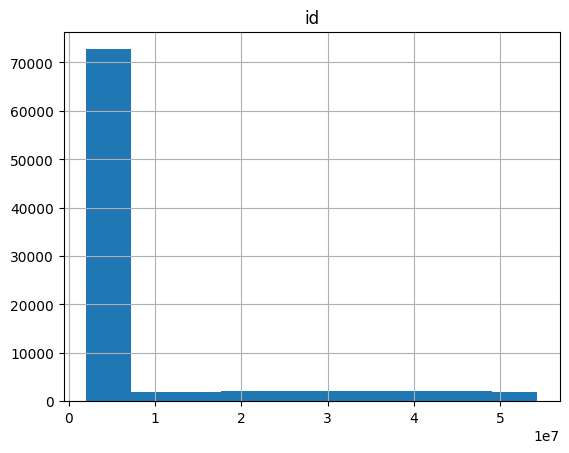

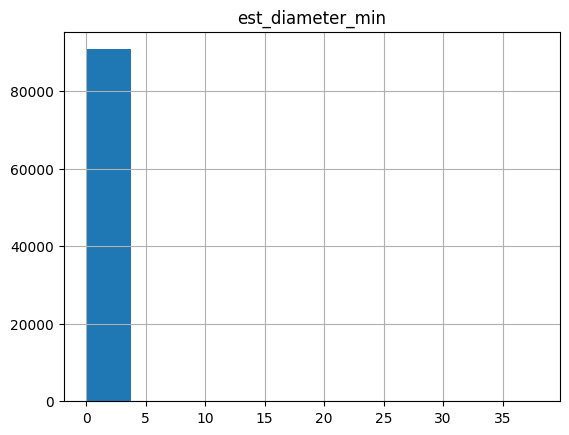

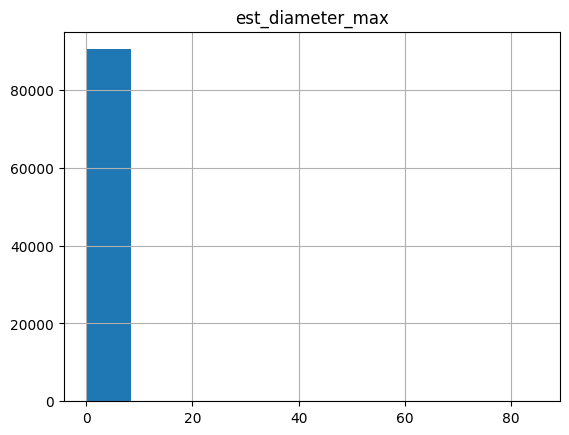

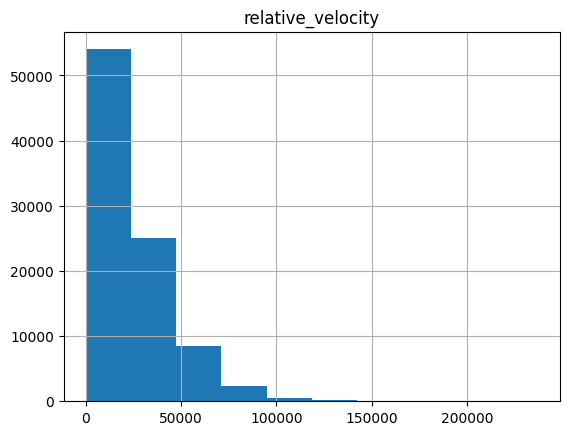

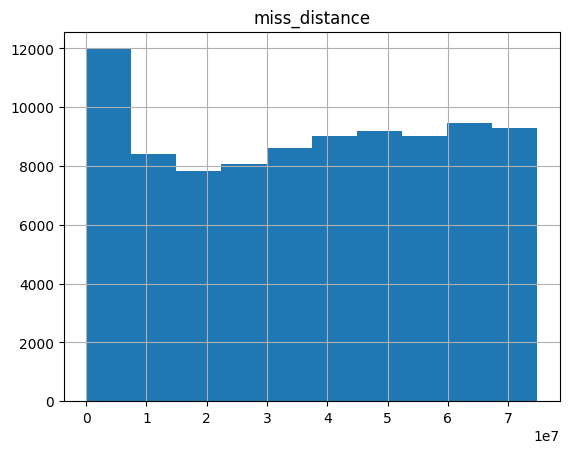

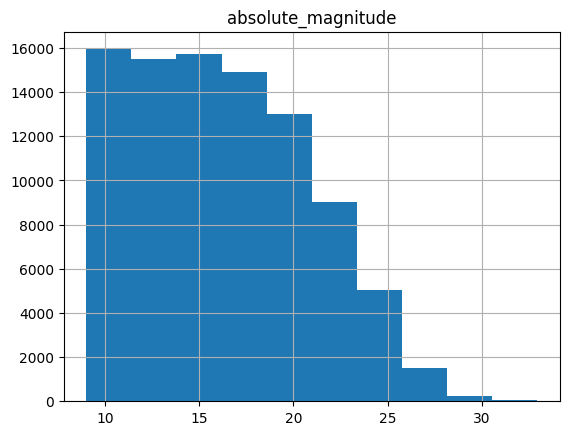

In [34]:
df.describe()[['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
columns = ['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

for column in columns:
    df.hist(column)

In [35]:
outlier = df[['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
outlier

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,3.127934e+06,0.016016,0.034721,23231.908652,1.024333e+06,22.974323
1,5.152281e+07,0.030518,0.066445,1724.561312,3.268186e+07,9.061389
2,2.826400e+06,0.055533,0.071110,15558.391733,6.538636e+07,17.614851
3,3.361112e+06,0.019256,0.032146,13125.105675,1.260796e+07,19.566672
4,2.985534e+06,0.139494,0.095298,3017.312526,7.130590e+07,19.007212
...,...,...,...,...,...,...
90831,1.842982e+07,0.017561,0.005411,4162.731028,1.635007e+06,14.531121
90832,3.120023e+06,0.110804,0.001635,3051.030542,3.351901e+07,12.036408
90833,3.378046e+06,0.035039,0.018323,91640.146699,5.471396e+07,13.774160
90834,3.370157e+06,0.044112,0.003089,34368.384988,2.694877e+07,11.519718


In [36]:
Q1 = outlier.quantile(0.25)
Q1

id                    2.341399e+06
est_diameter_min      1.925551e-02
est_diameter_max      1.515641e-02
relative_velocity     8.905916e+03
miss_distance         1.721082e+07
absolute_magnitude    1.243393e+01
Name: 0.25, dtype: float64

In [37]:
Q3 = outlier.quantile(0.75)
Q3

id                    3.624087e+06
est_diameter_min      1.434019e-01
est_diameter_max      1.423461e-01
relative_velocity     3.432598e+04
miss_distance         5.654900e+07
absolute_magnitude    1.964530e+01
Name: 0.75, dtype: float64

In [38]:
IQR = Q3-Q1
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,3.127934e+06,0.016016,0.034721,23231.908652,1.024333e+06,22.974323
2,2.826400e+06,0.055533,0.071110,15558.391733,6.538636e+07,17.614851
3,3.361112e+06,0.019256,0.032146,13125.105675,1.260796e+07,19.566672
4,2.985534e+06,0.139494,0.095298,3017.312526,7.130590e+07,19.007212
5,3.214137e+06,0.046191,0.052023,15635.121445,2.847083e+07,23.443432
...,...,...,...,...,...,...
90828,3.118930e+06,0.024241,0.027220,10356.067935,1.474121e+07,11.857002
90830,2.240928e+06,0.008405,0.016794,7654.830308,3.821292e+06,19.428120
90832,3.120023e+06,0.110804,0.001635,3051.030542,3.351901e+07,12.036408
90834,3.370157e+06,0.044112,0.003089,34368.384988,2.694877e+07,11.519718


In [39]:
index_list = list(data_filtered.index.values)
data_filtered = df[df.index.isin(index_list)]
data_filtered.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3.127934e+06,0.016016,0.034721,23231.908652,1.024333e+06,22.974323,False
2,2.826400e+06,0.055533,0.071110,15558.391733,6.538636e+07,17.614851,False
3,3.361112e+06,0.019256,0.032146,13125.105675,1.260796e+07,19.566672,False
4,2.985534e+06,0.139494,0.095298,3017.312526,7.130590e+07,19.007212,False
5,3.214137e+06,0.046191,0.052023,15635.121445,2.847083e+07,23.443432,False


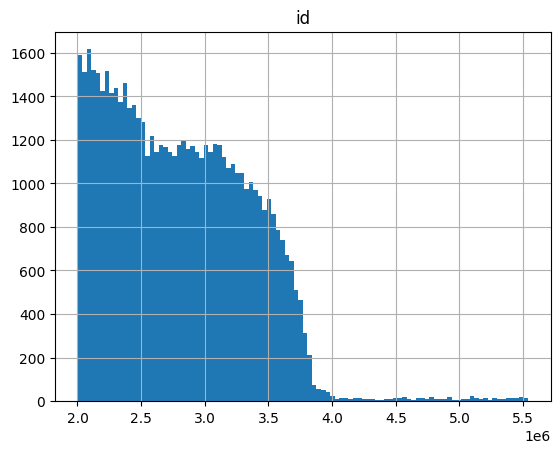

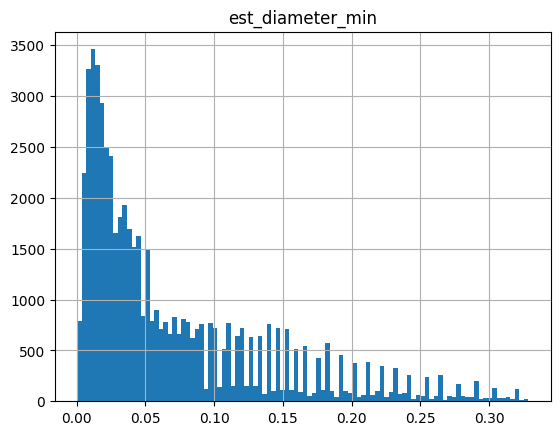

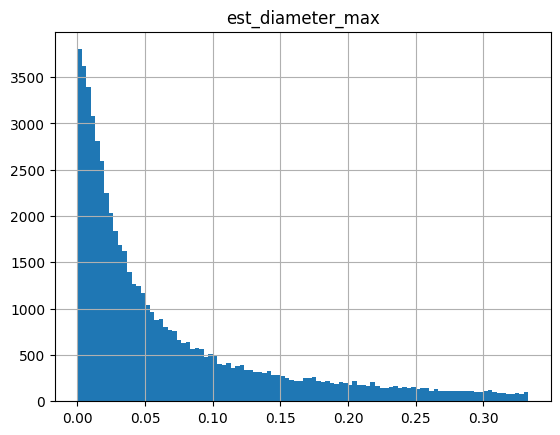

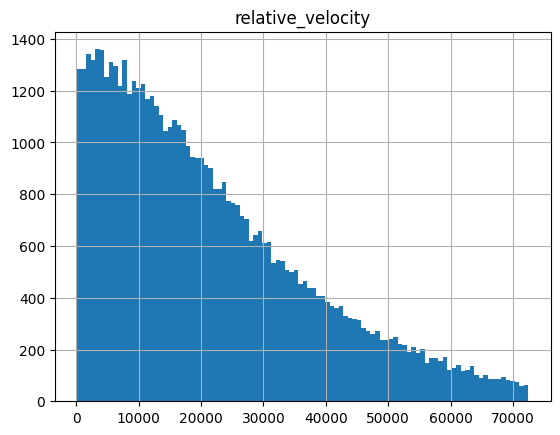

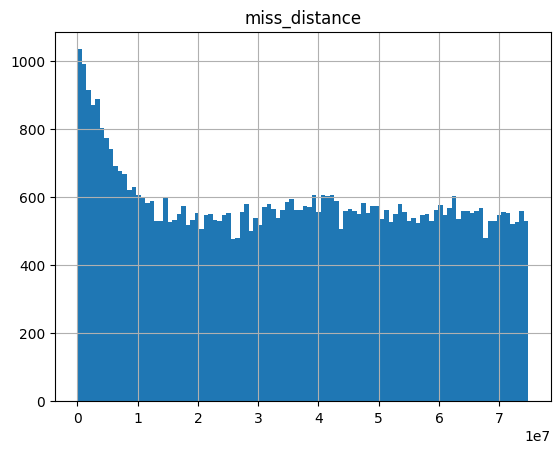

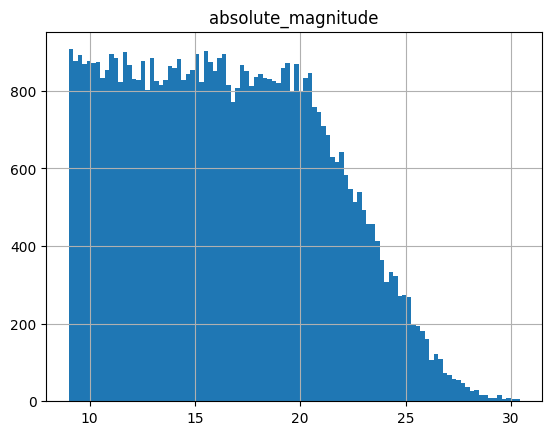

In [40]:
filtered_outlier = data_filtered[['id', 'est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

for col in filtered_outlier:
    data_filtered.hist(col, bins=100)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  float64
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
 6   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6)
memory usage: 4.2 MB


In [42]:
data_filtered.loc[(data_filtered['hazardous'] == "True"), 'hazardous'] = 1
data_filtered.loc[(data_filtered['hazardous'] == "False"), 'hazardous'] = 0
data_filtered['hazardous'] = data_filtered['hazardous'].astype(float)

C:\Users\Полина\AppData\Local\Temp\ipykernel_15508\4058979185.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_filtered.loc[(data_filtered['hazardous'] == "True"), 'hazardous'] = 1
C:\Users\Полина\AppData\Local\Temp\ipykernel_15508\4058979185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['hazardous'] = data_filtered['hazardous'].astype(float)


D:\environment\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\environment\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


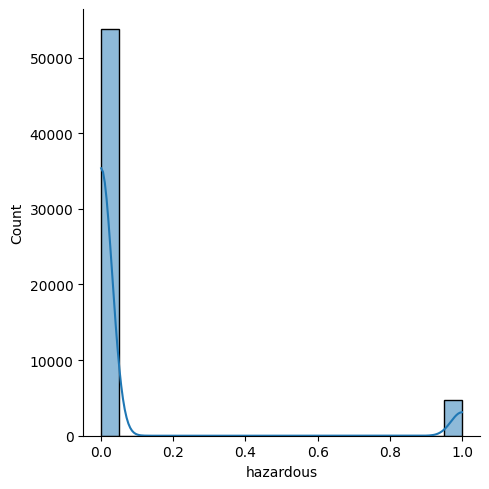

In [43]:
sns.displot(data_filtered["hazardous"],bins=20,kde=True);

In [44]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(data_filtered.drop(['hazardous'], axis=1))

In [45]:
Y = data_filtered["hazardous"]
X = data_scaler
Y

0        0.0
2        0.0
3        0.0
4        0.0
5        0.0
        ... 
90828    0.0
90830    0.0
90832    0.0
90834    0.0
90835    0.0
Name: hazardous, Length: 58448, dtype: float64

In [46]:
X

array([[ 0.59780784, -0.78407606, -0.44516378,  0.11108932, -1.54746198,
         1.41393973],
       [ 0.03749659, -0.20968399,  0.03345117, -0.35928573,  1.33848556,
         0.24399479],
       [ 1.03109877, -0.73698983, -0.47903481, -0.50844251, -1.02806048,
         0.67006723],
       ...,
       [ 0.58310707,  0.59367929, -0.88034777, -1.12596816, -0.0904239 ,
        -0.97375009],
       [ 1.04790775, -0.37569966, -0.86121764,  0.79373857, -0.38502859,
        -1.08654095],
       [ 1.24620778,  0.21049546, -0.61362045,  2.3174636 ,  0.03481489,
        -1.4056881 ]])

In [47]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, Y)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((72006, 6), (72006,), (35466, 6), (35466,))

In [50]:
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2) 
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [51]:
y_bin_knn_pred = knn.predict(X_test)
y_bin_knn_pred

array([1., 0., 1., ..., 1., 1., 0.])

In [52]:
confusion_matrix(Y_test, y_bin_knn_pred)

array([[15003,  2892],
       [   58, 17513]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     17895
         1.0       0.86      1.00      0.92     17571

    accuracy                           0.92     35466
   macro avg       0.93      0.92      0.92     35466
weighted avg       0.93      0.92      0.92     35466



In [54]:
from collections import Counter
Counter(Y_test)

Counter({0.0: 17895, 1.0: 17571})

In [55]:
def accuracy_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FP=arr[0,1]
    FN=arr[1,0]
    TN=arr[1,1]
    return((TP+TN)/(TP+TN+FP+FN))

In [56]:
def precision_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FP=arr[0,1]
    return(TP/(TP+FP))

In [57]:
def recall_score(Y_test, y_bin_knn_pred):
    arr=confusion_matrix(Y_test, y_bin_knn_pred)
    TP=arr[0,0]
    FN=arr[1,0]
    return(TP/(TP+FN))

In [58]:
def f1_score(Y_test, y_bin_knn_pred):
    multy=precision_score(Y_test, y_bin_knn_pred)*recall_score(Y_test, y_bin_knn_pred)
    sum=precision_score(Y_test, y_bin_knn_pred)+recall_score(Y_test, y_bin_knn_pred)
    return( 2*(multy/sum) )

In [59]:
accuracy_score(Y_test, y_bin_knn_pred)

0.9168217447696385

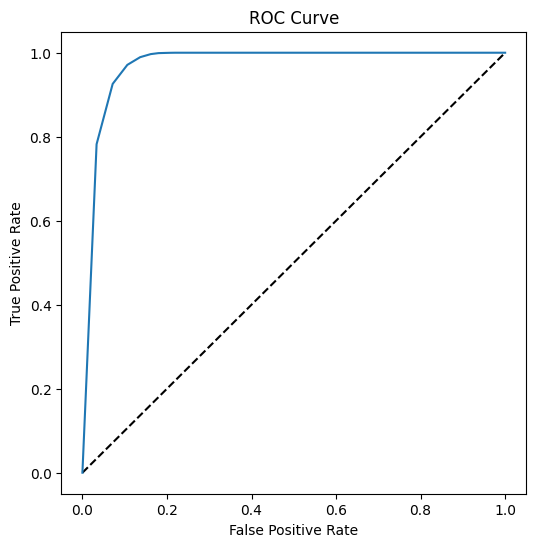

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
%matplotlib inline

y_scores = knn.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [61]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.971410221848661


In [62]:
rec = recall_score(Y_test,y_bin_knn_pred)
print(rec)

0.9961489940906978


In [63]:
prec = precision_score(Y_test,y_bin_knn_pred)
print(prec)

0.8383906119027661


In [64]:
print(f1_score(Y_test, y_bin_knn_pred))

0.9104867095521302


In [65]:
ridge = Ridge(alpha=0.5).fit(X_train, Y_train)

In [66]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, Y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [67]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_NB = gnb.predict(X_test)
print(classification_report(Y_test, Y_pred_NB))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84     17895
         1.0       0.83      0.86      0.85     17571

    accuracy                           0.85     35466
   macro avg       0.85      0.85      0.85     35466
weighted avg       0.85      0.85      0.85     35466



In [68]:
accuracy_score(Y_test, Y_pred_NB)

0.8451192691591948

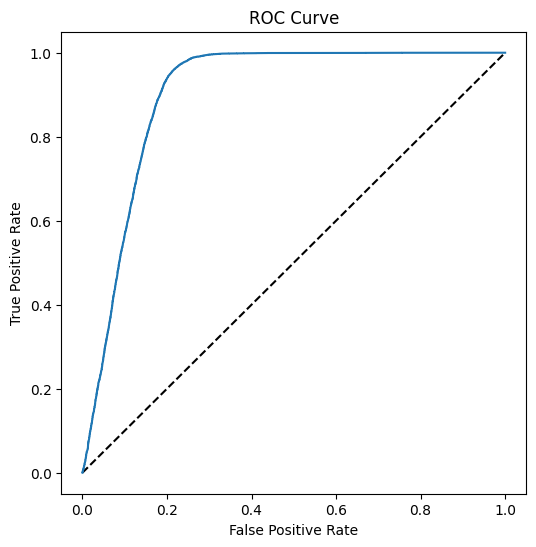

In [69]:
%matplotlib inline

y_scores = gnb.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [70]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9032446796423703


In [71]:
rec = recall_score(Y_test,Y_pred_NB)
print(rec)

0.8580254041570439


In [72]:
prec = precision_score(Y_test,Y_pred_NB)
print(prec)

0.8304554344789047


In [73]:
print(f1_score(Y_test, Y_pred_NB))

0.8440153343745563


In [74]:
from sklearn.linear_model import LogisticRegression


log = LogisticRegression(random_state=42).fit(X_train, Y_train)
Y_pred_log = log.predict(X_test)
log.score(X_train, Y_train)
print(classification_report(Y_test, Y_pred_log))

              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     17895
         1.0       0.85      0.91      0.88     17571

    accuracy                           0.87     35466
   macro avg       0.88      0.87      0.87     35466
weighted avg       0.88      0.87      0.87     35466



In [75]:
accuracy_score(Y_test, Y_pred_log)

0.8734562679749619

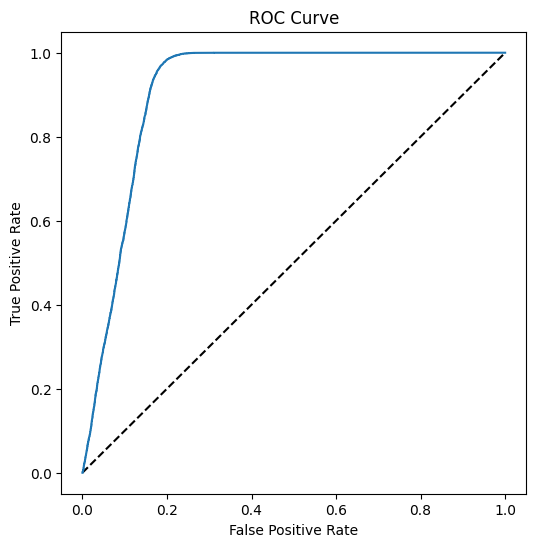

In [76]:
%matplotlib inline

y_scores = log.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [77]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9118074883000926


In [78]:
rec = recall_score(Y_test,Y_pred_log)
print(rec)

0.9016236295009287


In [79]:
prec = precision_score(Y_test,Y_pred_log)
print(prec)

0.8409611623358481


In [80]:
from sklearn import svm

clf = svm.SVC(probability=True)
clf.fit(X_train, Y_train)

Y_pred_sv = clf.predict(X_test)
print(classification_report(Y_test, Y_pred_sv))

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89     17895
         1.0       0.84      1.00      0.91     17571

    accuracy                           0.90     35466
   macro avg       0.92      0.90      0.90     35466
weighted avg       0.92      0.90      0.90     35466



In [81]:
print(f1_score(Y_test, Y_pred_log))

0.8702365118834211


In [82]:
accuracy_score(Y_test, Y_pred_sv)

0.902667343371116

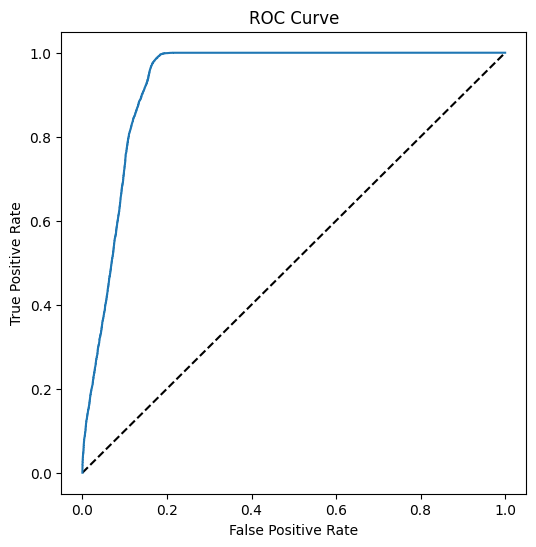

In [83]:
%matplotlib inline

y_scores = clf.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--')
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [84]:
auc = roc_auc_score(Y_test,y_scores[:,1])
print(auc)

0.9293276856444908


In [85]:
rec = recall_score(Y_test,Y_pred_sv)
print(rec)

0.997245748123666


In [86]:
prec = precision_score(Y_test,Y_pred_sv)
print(prec)

0.8093322157027103


In [87]:
print(f1_score(Y_test, Y_pred_sv))

0.8935159479301622


In [88]:
classifiers = {
    'SVC': clf,
    'KNN classifier': knn,
    'Logistic Regression': log,
    'Gaussian NB': gnb,
}
list = [Y_pred_sv, y_bin_knn_pred, Y_pred_log, Y_pred_NB]

In [89]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    accuracy = accuracy_score(Y_test, list[index])
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))
    print(classification_report(Y_test,list[index]))

Accuracy (train) for SVC: 90.3% 
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89     17895
         1.0       0.84      1.00      0.91     17571

    accuracy                           0.90     35466
   macro avg       0.92      0.90      0.90     35466
weighted avg       0.92      0.90      0.90     35466

Accuracy (train) for KNN classifier: 91.7% 
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     17895
         1.0       0.86      1.00      0.92     17571

    accuracy                           0.92     35466
   macro avg       0.93      0.92      0.92     35466
weighted avg       0.93      0.92      0.92     35466

Accuracy (train) for Logistic Regression: 87.3% 
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87     17895
         1.0       0.85      0.91      0.88     17571

    accuracy                           0.87     35466
  